In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from energyanalysis.data_classes import Building, BuildingData, HeatingSystem, Address, Results
from energyanalysis.plots import plot_hourly_series, plot_monthly_series, double_axis_monthly_plot, plot_npv
from energyanalysis.demand import Demand
from energyanalysis.geoenergy import GeoEnergy
from energyanalysis.air_water_heatpump import AirWaterHeatPump
from energyanalysis.district_heating import DistrictHeating
from energyanalysis.solar_panels import SolarPanels
from energyanalysis.electric_vehicle import ElectricVehicle
from energyanalysis.utilities import building_compilation, hour_to_month
from energyanalysis.operation_costs import OperationCosts
from energyanalysis.nnv_analysis import NetPresentValue


In [13]:
df_temperature = pd.read_excel('src/data/temperature_sheet_trondheim.xlsx')
outdoor_temperature = list(df_temperature['Trondheim (N3031)'])
print(outdoor_temperature)

[2.7, 1.93, 1.16, 0.39, -0.38, -1.15, -1.92, -2.69, -0.77, -0.62, -1.72, -1.77, -1.02, -1.37, -1.07, -0.57, -0.92, -0.72, -0.87, -0.87, -0.67, -0.37, -0.32, -0.52, -0.42, -0.67, 0.13, 0.13, 0.23, 0.48, 0.28, -0.47, -0.22, 0.28, -0.22, 0.03, 0.73, 0.43, 1.08, 0.58, 0.53, 0.38, 0.13, 0.58, 1.83, 0.53, 0.68, 0.33, -0.22, 0.08, 0.48, 0.98, 1.08, 0.53, -0.02, -0.37, -0.47, -0.42, -0.92, -1.52, -1.62, -2.32, -3.27, -4.02, -5.47, -6.12, -6.67, -7.22, -7.47, -7.57, -8.42, -8.57, -8.67, -9.22, -9.32, -9.42, -10.02, -9.57, -9.17, -9.12, -8.32, -7.52, -7.37, -6.92, -6.52, -7.27, -7.12, -6.67, -6.52, -6.32, -6.02, -5.42, -5.32, -4.87, -4.97, -4.77, -4.27, -3.97, -3.37, -2.77, -2.92, -2.22, -1.77, -1.52, -1.97, -1.67, 0.13, -0.27, 0.48, 0.53, 0.73, 0.93, 0.83, 1.48, 1.68, 1.63, 1.83, 1.78, 1.33, 1.23, 1.33, 1.23, 3.48, 4.58, 4.28, 4.03, 3.88, 1.98, 2.83, 2.88, 0.43, -0.27, -0.52, -0.77, -0.67, -0.42, -0.92, -1.32, -1.57, -1.82, -1.87, -1.67, -1.87, -2.02, -2.17, -2.07, -1.97, -1.77, -1.87, -1.77, -

In [14]:
building = Building(
    data=BuildingData([2898], ['Kontor'], ['Middels energieffektiv'], outdoor_temperature, [100, 100]),
    address=Address('Test', 63, 10),
    results=Results(),
    )

In [15]:
# Demand().profet_api(building, spaceheating_target_sum=1200000, dhw_target_sum=0, electric_target_sum=0)
Demand().profet_api(building)


(array([16.32057644, 16.85852974, 18.00051088, ..., 13.95021373,
        13.53718175, 14.6948243 ]),
 array([2.43774394, 2.4487717 , 2.14256041, ..., 3.1287473 , 2.72893178,
        2.63896549]),
 array([32.42229656, 32.31944944, 32.57269697, ..., 53.58657893,
        51.74461013, 50.39771247]))

In [22]:
GeoEnergy().simple_sizing(building=building, spaceheating_coverage=90, spaceheating_cop=3.5, dhw_coverage=60, dhw_cop=3.5)

(array([5.32489388, 5.47859482, 5.75516323, ..., 4.64764739, 4.52963826,
        4.86039327]),
 array([13.3122347 , 13.69648706, 14.38790806, ..., 11.61911848,
        11.32409564, 12.15098317]),
 array([0.12119179, 0.13221956, 0.        , ..., 0.81219516, 0.41237963,
        0.32241335]),
 1174,
 np.float64(25.2))

In [23]:
print(vars(building.results.energy))

{'spaceheating': array([16.32057644, 16.85852974, 18.00051088, ..., 13.95021373,
       13.53718175, 14.6948243 ]), 'dhw': array([2.43774394, 2.4487717 , 2.14256041, ..., 3.1287473 , 2.72893178,
       2.63896549]), 'elspecific': array([32.42229656, 32.31944944, 32.57269697, ..., 53.58657893,
       51.74461013, 50.39771247]), 'heating': array([18.75832038, 19.30730144, 20.14307129, ..., 17.07896104,
       16.26611353, 17.33378979]), 'cooling': None, 'geoenergy_compressor': array([5.32489388, 5.47859482, 5.75516323, ..., 4.64764739, 4.52963826,
       4.86039327]), 'geoenergy_extracted_from_wells': array([13.3122347 , 13.69648706, 14.38790806, ..., 11.61911848,
       11.32409564, 12.15098317]), 'geoenergy_peak': array([0.12119179, 0.13221956, 0.        , ..., 0.81219516, 0.41237963,
       0.32241335]), 'geoenergy_electricity': array([5.44608568, 5.61081439, 5.75516323, ..., 5.45984255, 4.94201789,
       5.18280662]), 'air_water_heat_pump_compressor': None, 'air_water_heat_pump_extr

In [24]:
print(f'Romoppvarmingsbehov: {int(building.results.energy.spaceheating.sum()):,} kWh/år'.replace(',', ' '))
print(f'Tappevannsbehov: {int(building.results.energy.dhw.sum()):,} kWh/år'.replace(',', ' '))
print(f'Elspesifikt behov: {int(building.results.energy.elspecific.sum()):,} kWh/år'.replace(',', ' '))

Romoppvarmingsbehov: 123 558 kWh/år
Tappevannsbehov: 34 769 kWh/år
Elspesifikt behov: 504 377 kWh/år


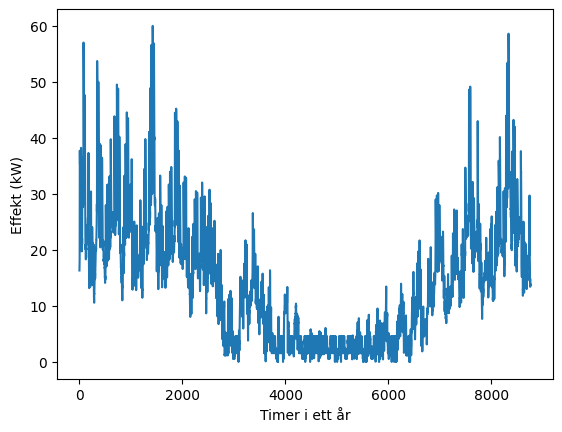

In [25]:
plt.plot(building.results.energy.spaceheating)
plt.xlabel("Timer i ett år")
plt.ylabel("Effekt (kW)")
plt.show()